Nama : Muhammad Dafa Wisnu Galih

NIM : 22/503607/PA/21649

#EDA (Task 2n3)

##Import Library dan Dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import matplotlib.ticker as ticker

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/[Dataset for Colab]/E Commerce Dataset (1).xlsx", sheet_name = "E Comm")

##Informasi Awal tentang Dataset

In [ ]:
df.head(10)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
5,50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,122.93


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.shape

(5630, 20)

Dari kode di atas diketahui bahwa dataset ini memiliki 20 fitur dengan 5 fitur kategorikal dan 15 fitur numerikal. Kemudian kita bagi dataset tersebut menjadi dua, yaitu kategorikal dan numerikal.

In [ ]:
categorical = ["PreferredLoginDevice", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus"]
numerical = ["Churn", "Tenure", "CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "Complain", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", "CashbackAmount"]

In [ ]:
df[numerical].describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
df[categorical].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


##Analisis Masing-Masing Variabel

Akan dilakukan analisis univariate variabel numerikal meliputi: "Tenure", "CityTier", "WarehouseToHome", "HourSpendOnApp", "NumberOfDeviceRegistered", "SatisfactionScore", "NumberOfAddress", "Complain", "OrderAmountHikeFromlastYear", "CouponUsed", "OrderCount", "DaySinceLastOrder", dan "CashbackAmount".

Variabel yang tidak diikutkan adalah "Churn" dan "Complain" karena bernilai 1 atau 0 (ya atau tidak), jika ditampilkan dalam bentuk boxplot menjadi terfokus di kanan ataupun di kiri. Selain itu, variabel CustomerID juga tidak ditampilkan karena hanyalah nomor unik di tiap barisnya.

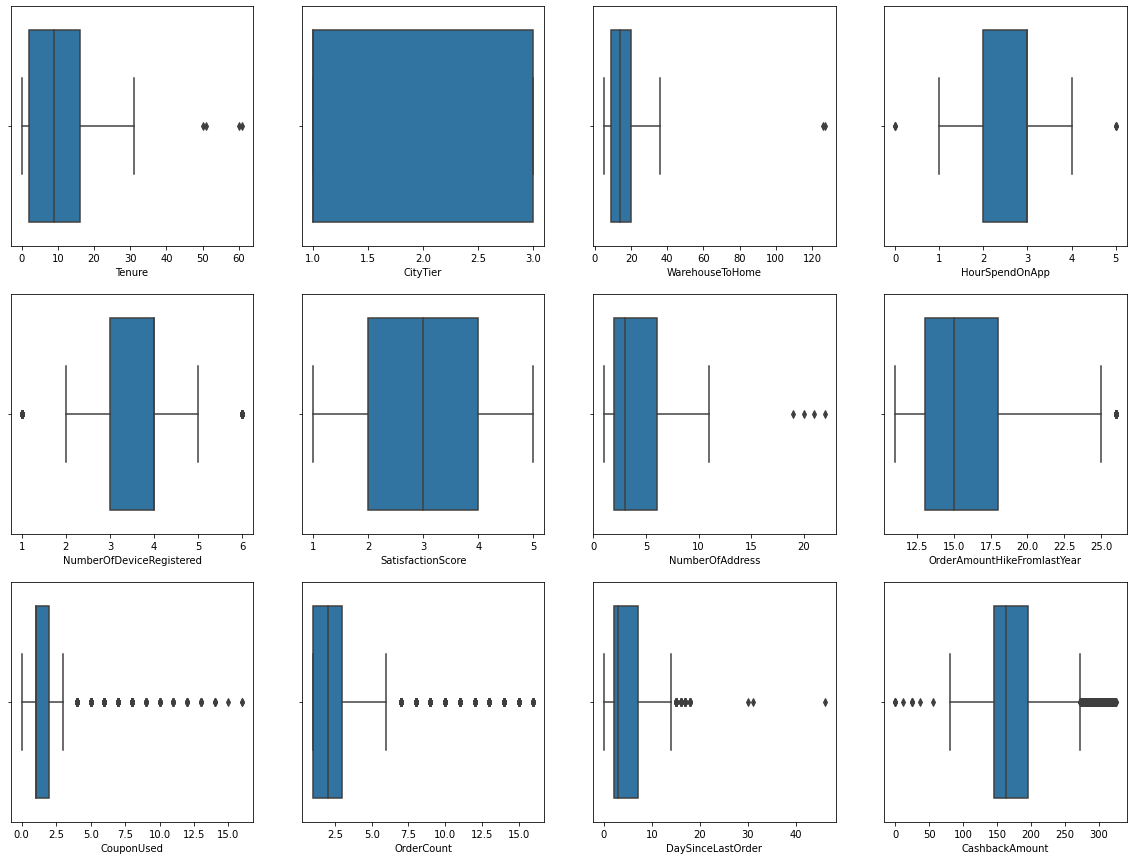

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(3,4,1)
sns.boxplot(x=df['Tenure'])

plt.subplot(3,4,2)
sns.boxplot(x=df['CityTier'])

plt.subplot(3,4,3)
sns.boxplot(x=df['WarehouseToHome'])

plt.subplot(3,4,4)
sns.boxplot(x=df['HourSpendOnApp'])

plt.subplot(3,4,5)
sns.boxplot(x=df['NumberOfDeviceRegistered'])

plt.subplot(3,4,6)
sns.boxplot(x=df['SatisfactionScore'])

plt.subplot(3,4,7)
sns.boxplot(x=df['NumberOfAddress'])

plt.subplot(3,4,8)
sns.boxplot(x=df['OrderAmountHikeFromlastYear'])

plt.subplot(3,4,9)
sns.boxplot(x=df['CouponUsed'])

plt.subplot(3,4,10)
sns.boxplot(x=df['OrderCount'])

plt.subplot(3,4,11)
sns.boxplot(x=df['DaySinceLastOrder'])

plt.subplot(3,4,12)
sns.boxplot(x=df['CashbackAmount'])

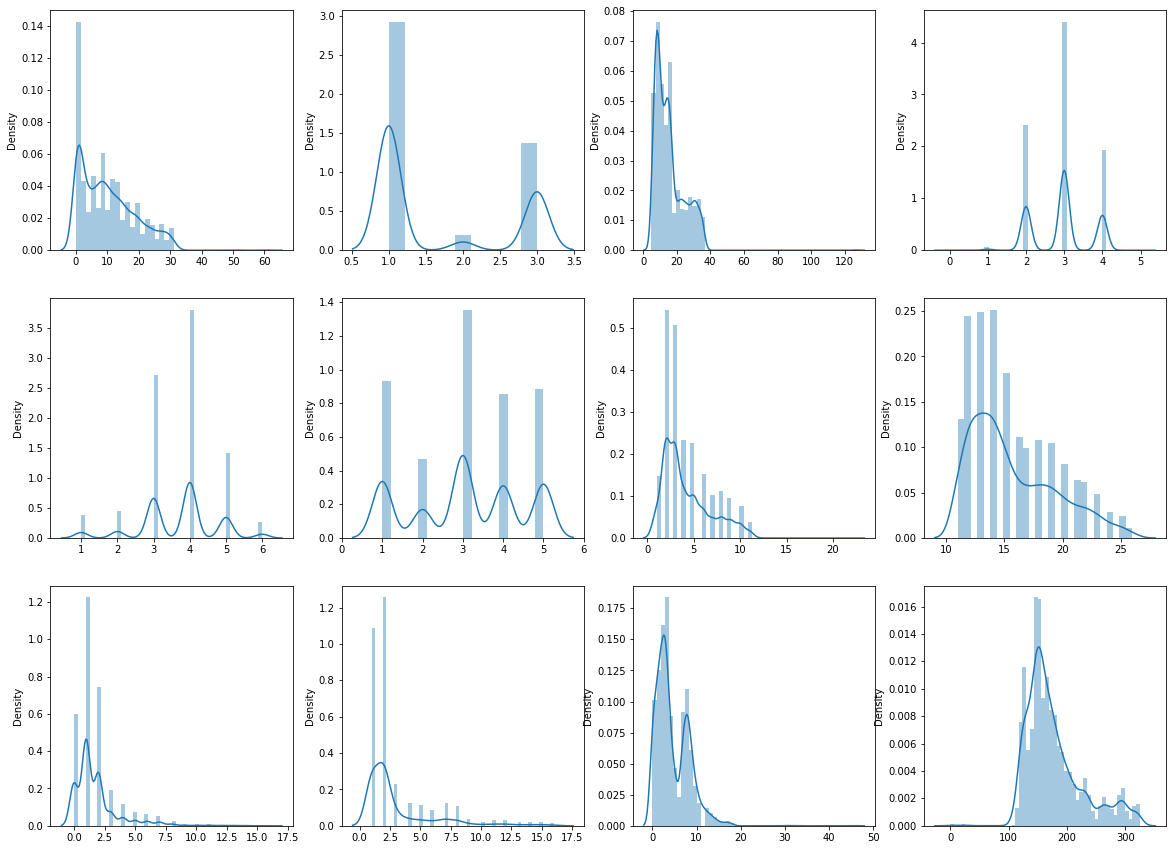

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(3,4,1)
sns.distplot(x=df['Tenure'])

plt.subplot(3,4,2)
sns.distplot(x=df['CityTier'])

plt.subplot(3,4,3)
sns.distplot(x=df['WarehouseToHome'])

plt.subplot(3,4,4)
sns.distplot(x=df['HourSpendOnApp'])

plt.subplot(3,4,5)
sns.distplot(x=df['NumberOfDeviceRegistered'])

plt.subplot(3,4,6)
sns.distplot(x=df['SatisfactionScore'])

plt.subplot(3,4,7)
sns.distplot(x=df['NumberOfAddress'])

plt.subplot(3,4,8)
sns.distplot(x=df['OrderAmountHikeFromlastYear'])

plt.subplot(3,4,9)
sns.distplot(x=df['CouponUsed'])

plt.subplot(3,4,10)
sns.distplot(x=df['OrderCount'])

plt.subplot(3,4,11)
sns.distplot(x=df['DaySinceLastOrder'])

plt.subplot(3,4,12)
sns.distplot(x=df['CashbackAmount'])

Dari boxplot dan distplot, dapat terlihat nilai-nilai outlier dan pola distribusi data masing-masing variabel.

Untuk variabel **"Tenure", "WarehouseToHome", "NumberOfAddress", "CouponUsed", "OrderCount", dan "DaySinceLastOrder"** tampak memiliki data outlier atau data yang ekstrem. Ini dapat dibersihkan dengan menghapus data-data tersebut.

Untuk pola distribusi, kebanyakan memiliki pola skewed atau miring ke kanan maupun ke kiri.

##Analisis Hubungan dengan Variabel Target

Mula-mula akan ditunjukkan hubungan antara seluruh data numerikal dengan variabel target "Churn" untuk dilihat mana yang memiliki perbedaan tertinggi.

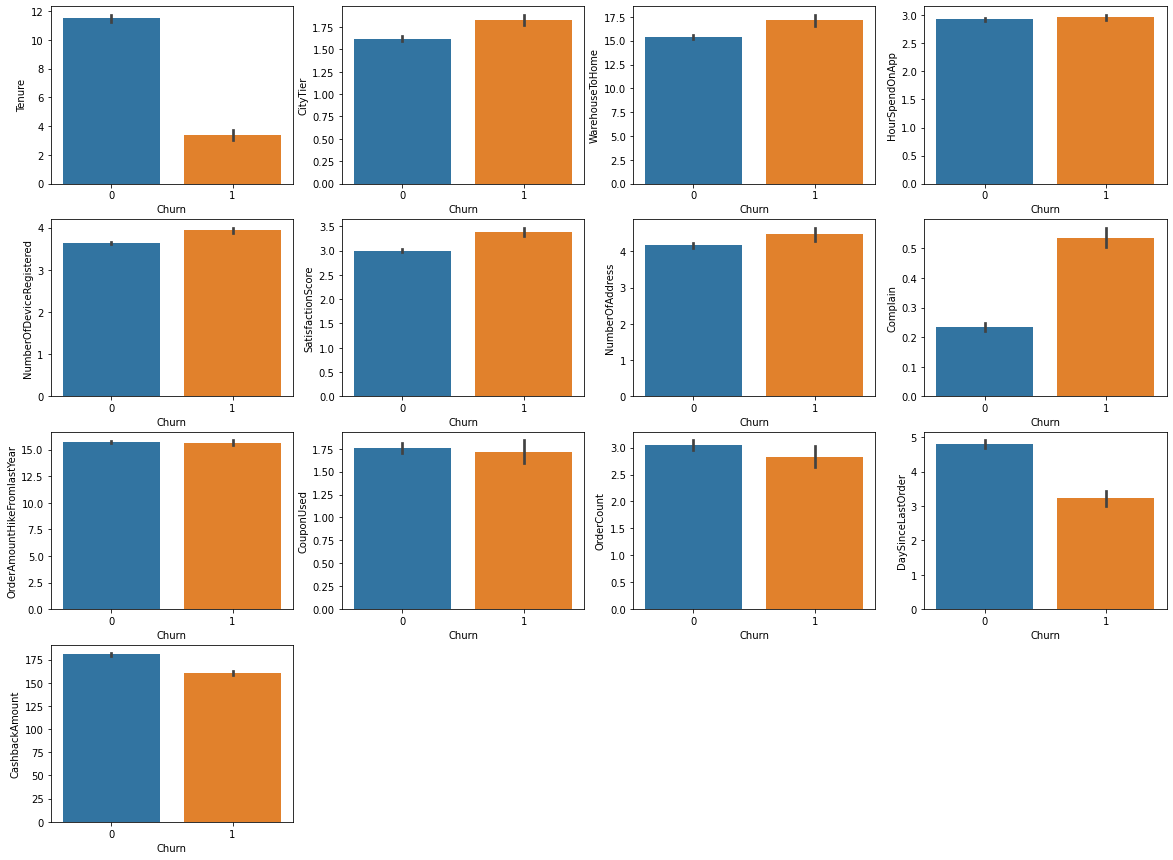

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(4,4,1)
sns.barplot(x=df['Churn'], y=df['Tenure'])

plt.subplot(4,4,2)
sns.barplot(x=df['Churn'], y=df['CityTier'])

plt.subplot(4,4,3)
sns.barplot(x=df['Churn'], y=df['WarehouseToHome'])

plt.subplot(4,4,4)
sns.barplot(x=df['Churn'], y=df['HourSpendOnApp'])

plt.subplot(4,4,5)
sns.barplot(x=df['Churn'], y=df['NumberOfDeviceRegistered'])

plt.subplot(4,4,6)
sns.barplot(x=df['Churn'], y=df['SatisfactionScore'])

plt.subplot(4,4,7)
sns.barplot(x=df['Churn'], y=df['NumberOfAddress'])

plt.subplot(4,4,8)
sns.barplot(x=df['Churn'], y=df['Complain'])

plt.subplot(4,4,9)
sns.barplot(x=df['Churn'], y=df['OrderAmountHikeFromlastYear'])

plt.subplot(4,4,10)
sns.barplot(x=df['Churn'], y=df['CouponUsed'])

plt.subplot(4,4,11)
sns.barplot(x=df['Churn'], y=df['OrderCount'])

plt.subplot(4,4,12)
sns.barplot(x=df['Churn'], y=df['DaySinceLastOrder'])

plt.subplot(4,4,13)
sns.barplot(x=df['Churn'], y=df['CashbackAmount'])

> Dari kumpulan grafik di atas, dapat dilihat bahwa yang terlihat paling besar perbedaan antara 0 dan 1 pada variabel target "Churn" adalah **Tenure, Complain, dan DaySinceLastOrder**.

Beberapa hal yang mungkin bisa didapat dari grafik di atas adalah:

**Tenure**: Dalam hal ini, wajar jika customer yang tetap memakai platform ini memiliki rerata masa pemakaian cukup lama (kurang lebih 11 bulan) sedangkan customer yang tidak lagi memakai platform ini memiliki rerata masa pemakaian yang lebih pendek (kurang lebih 3 bulan).

**Complain**: Sekitar 50% orang yang memilih tidak lagi menggunakan platform kita memberikan komplain dan sekitar 22% orang yang masih menggunakan platform kita juga mengirimkan komplain. Keduanya memiliki perbedaan yang cukup jauh. Dengan data ini juga dapat dilakukan research lebih lanjut mengenai komplain customer untuk mengetahui alasan customer meninggalkan platform ini.

**DaySinceLastOrder**: Rata-rata customer yang memilih untuk meninggalkan platform ini terakhir memesan pada 3 hari yang lalu sedangkan rata-rata customer yang memilih untuk tetap menggunakan platform ini terakhir memesan sekitar 5 hari yang lalu. Mungkin terdapat lonjakan pengguna tempo hari, tetapi customer-customer tersebut tidak melanjutkan penggunaan platform ini lagi.

---



Langkah selanjutnya akan dicari persentase customer yang pindah dengan rumus
$\frac{CustomerPindah}{Total Data Customer}$ untuk mengetahui persentase normal perpindahan customer

In [ ]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

Maka persentase customer yang pindah sebesar $\frac {948}{4682+948} \times 100 = 16.83$%

Selanjutnya akan ditunjukkan hubungan antara data kategorikal dengan variabel target "Churn". Namun sebelum itu akan dilakukan beberapa penyesuaian terhadap variabel kategorikal karena terdapat beberapa variabel yang saling tumpang tindih, yaitu:


*   CC dan Credit Card di variabel "PreferredPaymentMethod" merupakan metode yang sama
*   Cash On Delivery dan COD di variabel "PreferredPaymentMethod" merupakan metode yang sama
*   Mobile Phone dan Phone di variabel "PreferredLoginDevice" dapat dianggap sama menjadi  Mobile Phone
*   Mobile dan Mobile Phone di variabel "PreferredOrderCat" dapat dianggap sama menjadi Mobile Phone



In [ ]:
df["PreferredPaymentMode"][df["PreferredPaymentMode"] == "Cash on Delivery"] = "COD"
df["PreferredPaymentMode"][df["PreferredPaymentMode"] == "Credit Card"] = "CC"

In [ ]:
df["PreferredLoginDevice"][df["PreferredLoginDevice"] == "Phone"] = "Mobile Phone"

In [ ]:
df["PreferedOrderCat"][df["PreferedOrderCat"] == "Mobile"] = "Mobile Phone"

Setelah dilakukan penyesuaian, maka akan ditunjukkan grafik hubungan tiap variabel dengan variabel target "Churn"

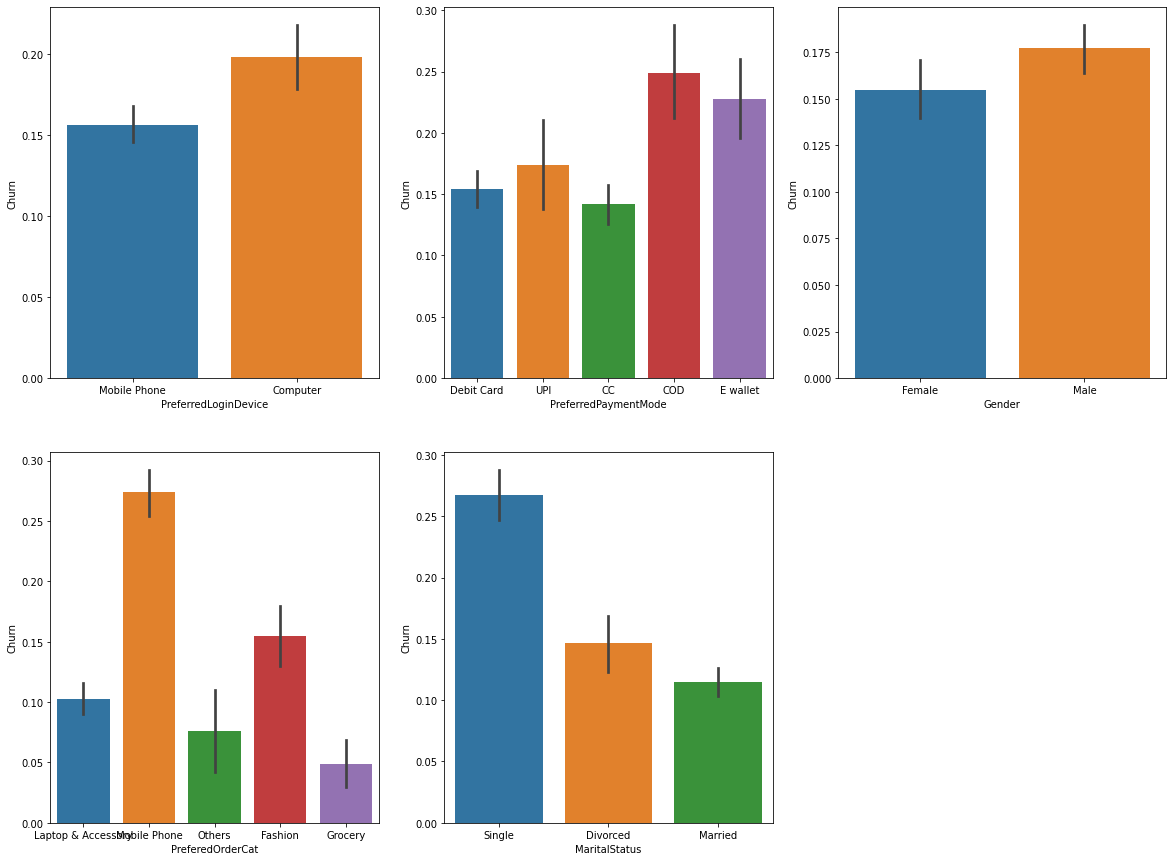

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(2,3,1)
sns.barplot(y=df['Churn'], x=df['PreferredLoginDevice'])

plt.subplot(2,3,2)
sns.barplot(y=df['Churn'], x=df['PreferredPaymentMode'])

plt.subplot(2,3,3)
sns.barplot(y=df['Churn'], x=df['Gender'])

plt.subplot(2,3,4)
sns.barplot(y=df['Churn'], x=df['PreferedOrderCat'])

plt.subplot(2,3,5)
sns.barplot(y=df['Churn'], x=df['MaritalStatus'])

Beberapa insight yang bisa diambil dari kumpulan grafik di atas antara lain:

**PreferedLoginDevice**: Tidak ada perbedaan yang berarti antara menggunakan Mobile Phone dan Computer, keduanya memiliki persentase sekitar persentase churn awal.

**PreferredPaymentMode**: Untuk metode Debit Card, UPI, dan CC masih normal tetapi perlu diperhatikan metode COD dan E wallet memiliki persentase yang cukup tinggi, mungkin bisa dianalisis dan diberi tindakan lebih lanjut mengenai kedua metode tersebut.

**Gender**: Tidak ada perbedaan berarti antara laki-laki dan perempuan.

**PreferedOrderCat**: Terdapat perbedaan persentase yang cukup tinggi di kategori Mobile Phone, mungkin kategori tersebut masih sering mengalami masalah dalam pembeliannya di platform ini, misalnya masalah klaim garansi, barang tiruan, dan sebagainya yang menyebabkan customer pindah dari platform ini.

**MaritalStatus**: Pada status Single terdapat persentase perpindahan yang cukup tinggi, mungkin dapat diberi promo atau cashback yang jomblo-friendly untuk menarik lagi minat customer.

##Analisis Korelasi Antar Variabel

Dalam hal ini akan digunakan heatmap untuk menunjukkan hubungan antara semua variabel dalam dataaset.

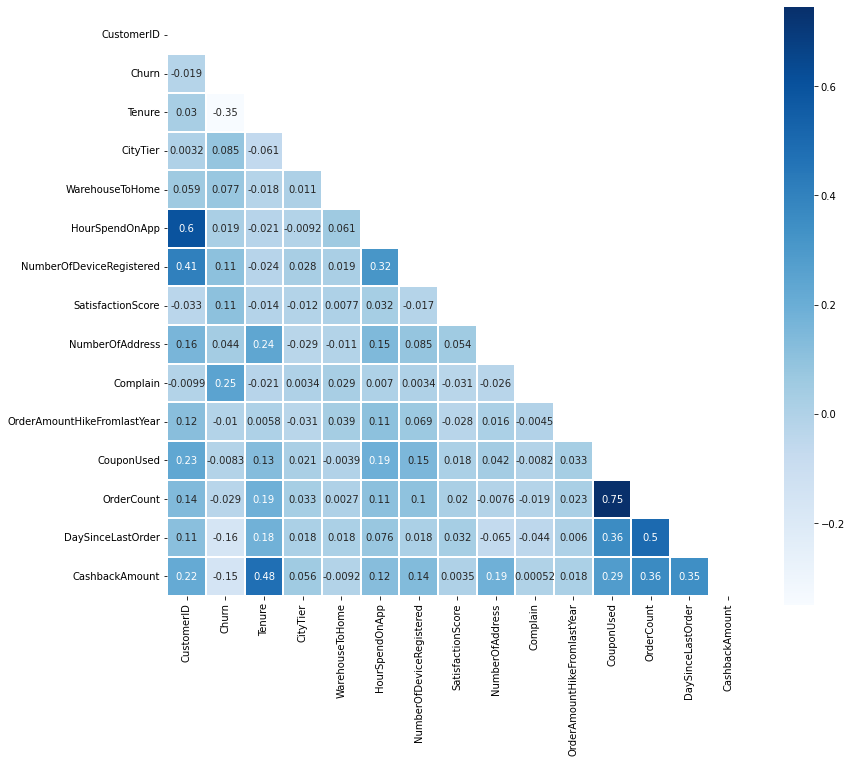

In [ ]:
f, ax = plt.subplots(figsize=(13, 11))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),cmap="Blues",mask=mask, square=True,linewidths=1,annot=True)

Dari heatmap di atas dapat diketahui bahwa variabel yang cukup signifikan berpengaruh pada variabel target "Churn" adalah **Tenure**, **Complain**, dan **DaySinceLastOrder** yang berbeda tipis dengan **CashbackAmount**. Hal ini mengonfirmasi dugaan sebelumnya bahwa variabel-variabel tersebut memang berpengaruh terhadap variabel target.

##Kesimpulan

Dataset yang diterima sejak awal sudah cukup baik ditunjukkan dengan lengkapnya data meskipun ada beberapa kategori yang perlu dilakukan penyesuaian.

Beberapa poin yang dapat disimpulkan antara lain:
*   Variabel **Tenure** berhubungan erat dengan variabel target dimana semakin lama masa penggunaan orang tersebut dengan platform ini, semakin kecil pula ia akan berpindah dari platform ini. Hal ini bisa didukung dengan tetap menjaga fitur dan promo bagi pengguna lama agar tetap merasa nyaman di platform ini.
*   Variabel **Complain** berhubungan cukup erat dengan variabel target dimana orang-orang yang berpindah dari platform ini pasti pernah melakukan komplain terhadap platform ini. Mungkin bagian pelayanan dapat cepat tanggap dalam mengatasi masukan dan komplain yang ada agar mengurangi potensi perpindahan customer.
*   Variabel **DaySinceLastOrder** dan **CashbackAmount** memiliki sedikit hubungan dengan variabel target, mungkin ini bisa dicoba digunakan dalam trial dan error pembuatan model Machine Learning nantinya.
*   Terdapat beberapa catatan di kategori pembayaran **"COD" dan "E-Wallet"**, kategori pemesanan barang jenis **"Mobile Phone"**, dan pemesanan bagi customer yang **"Single"**. Kategori-kategori tersebut memiliki persentase Churn / Perpindahan Customer yang tinggi. Mungkin bisa dilakukan penindaklanjutan atau analisis masalah lebih lanjut di kategori-kategori tersebut.

#Machine Learning Preparation (Task 4)

##Mengatasi Missing Value

Untuk mengatasi missing value, pertama-tama kita cek dulu ada tidaknya missing value dalam data.

In [ ]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df.shape

(5630, 20)

In [ ]:
df1 = df
df1.dropna(axis=0, how='any', subset=None, inplace=True)

In [ ]:
df1.shape

(3774, 20)

##Mengatasi Data Duplikasi

In [ ]:
df1.duplicated().sum()

0

Data duplikasi sudah 0

##Mengatasi Data Outlier

Sebelumnya, mari kita lihat terlebih dahulu boxplot dari masing-masing variabel numerikal

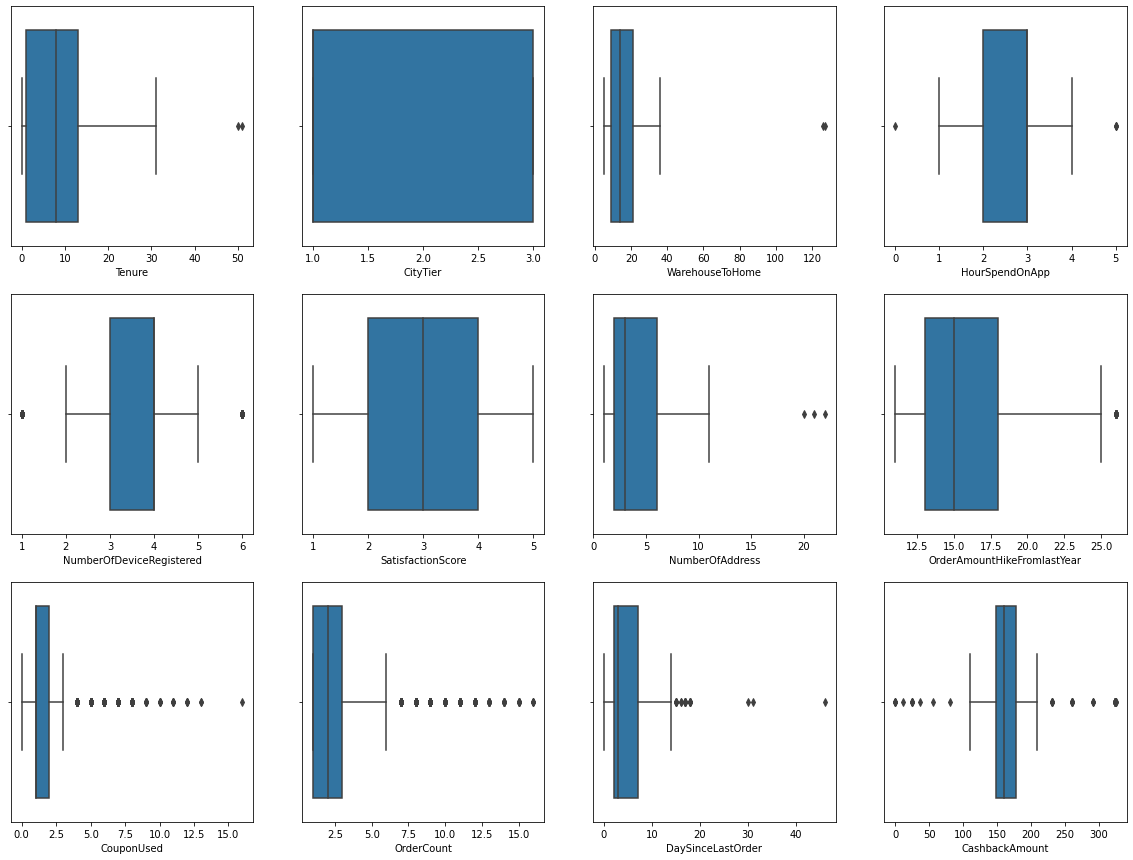

In [ ]:
plt.figure(figsize = (20,15))

plt.subplot(3,4,1)
sns.boxplot(x=df1['Tenure'])

plt.subplot(3,4,2)
sns.boxplot(x=df1['CityTier'])

plt.subplot(3,4,3)
sns.boxplot(x=df1['WarehouseToHome'])

plt.subplot(3,4,4)
sns.boxplot(x=df1['HourSpendOnApp'])

plt.subplot(3,4,5)
sns.boxplot(x=df1['NumberOfDeviceRegistered'])

plt.subplot(3,4,6)
sns.boxplot(x=df1['SatisfactionScore'])

plt.subplot(3,4,7)
sns.boxplot(x=df1['NumberOfAddress'])

plt.subplot(3,4,8)
sns.boxplot(x=df1['OrderAmountHikeFromlastYear'])

plt.subplot(3,4,9)
sns.boxplot(x=df1['CouponUsed'])

plt.subplot(3,4,10)
sns.boxplot(x=df1['OrderCount'])

plt.subplot(3,4,11)
sns.boxplot(x=df1['DaySinceLastOrder'])

plt.subplot(3,4,12)
sns.boxplot(x=df1['CashbackAmount'])

Dalam mengatasi data outlier, akan dihapus data outlier ekstrem di variabel **Tenure, WarehouseToHome, dan NumberOfAddress**

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['Tenure']:
    low_limit = 0
    high_limit = 40

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 3774
Jumlah baris setelah memfilter outlier: 3772


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['WarehouseToHome']:
    low_limit = 0
    high_limit = 100

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 3772
Jumlah baris setelah memfilter outlier: 3770


In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([True] * len(df1))
for col in ['NumberOfAddress']:
    low_limit = 0
    high_limit = 15

    filtered_entries = ((df1[col] >= low_limit) & (df1[col] <= high_limit)) & filtered_entries

df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 3770
Jumlah baris setelah memfilter outlier: 3767


##Normalisasi dan Standarisasi

Satuan dalam variabel-variabel di dataset tidak perlu dinormalisasi ataupun distandarisasi

In [ ]:
df1.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000,3767.000000
mean,53018.988585,0.167242,8.745952,1.707990,15.691266,2.980887,3.755508,3.057340,4.204938,0.282453,15.720998,1.719936,2.827183,4.527741,164.219793
std,1609.262423,0.373241,7.613888,0.936767,8.211619,0.722270,1.024633,1.389936,2.519377,0.450252,3.625080,1.675915,2.469382,3.371291,24.103628
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51660.000000,0.000000,1.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,148.490000
50%,53161.000000,0.000000,8.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,160.050000
75%,54398.000000,0.000000,13.000000,3.000000,21.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,178.025000
max,55630.000000,1.000000,31.000000,3.000000,36.000000,5.000000,6.000000,5.000000,11.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


##Feature Encoding dan Selection

Variabel **CustomerID** tidak begitu diperlukan dan memiliki hubungan yang sangat rendah dengan variabel target sehingga akan di-drop

In [ ]:
df1 = df1.drop(columns=['CustomerID','CouponUsed', 'OrderCount', 'HourSpendOnApp', 'NumberOfAddress'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3767 entries, 0 to 5629
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        3767 non-null   int64  
 1   Tenure                       3767 non-null   float64
 2   PreferredLoginDevice         3767 non-null   object 
 3   CityTier                     3767 non-null   int64  
 4   WarehouseToHome              3767 non-null   float64
 5   PreferredPaymentMode         3767 non-null   object 
 6   Gender                       3767 non-null   object 
 7   NumberOfDeviceRegistered     3767 non-null   int64  
 8   PreferedOrderCat             3767 non-null   object 
 9   SatisfactionScore            3767 non-null   int64  
 10  MaritalStatus                3767 non-null   object 
 11  Complain                     3767 non-null   int64  
 12  OrderAmountHikeFromlastYear  3767 non-null   float64
 13  DaySinceLastOrder 

In [ ]:
df2 = df1
new_categorical = ['PreferedOrderCat','PreferredLoginDevice', 'MaritalStatus']

In [ ]:
for cat in new_categorical:
    onehots = pd.get_dummies(df1[new_categorical], prefix=new_categorical)
    df2 = df1.join(onehots)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3767 entries, 0 to 5629
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Churn                                3767 non-null   int64  
 1   Tenure                               3767 non-null   float64
 2   PreferredLoginDevice                 3767 non-null   object 
 3   CityTier                             3767 non-null   int64  
 4   WarehouseToHome                      3767 non-null   float64
 5   PreferredPaymentMode                 3767 non-null   object 
 6   Gender                               3767 non-null   object 
 7   NumberOfDeviceRegistered             3767 non-null   int64  
 8   PreferedOrderCat                     3767 non-null   object 
 9   SatisfactionScore                    3767 non-null   int64  
 10  MaritalStatus                        3767 non-null   object 
 11  Complain                      

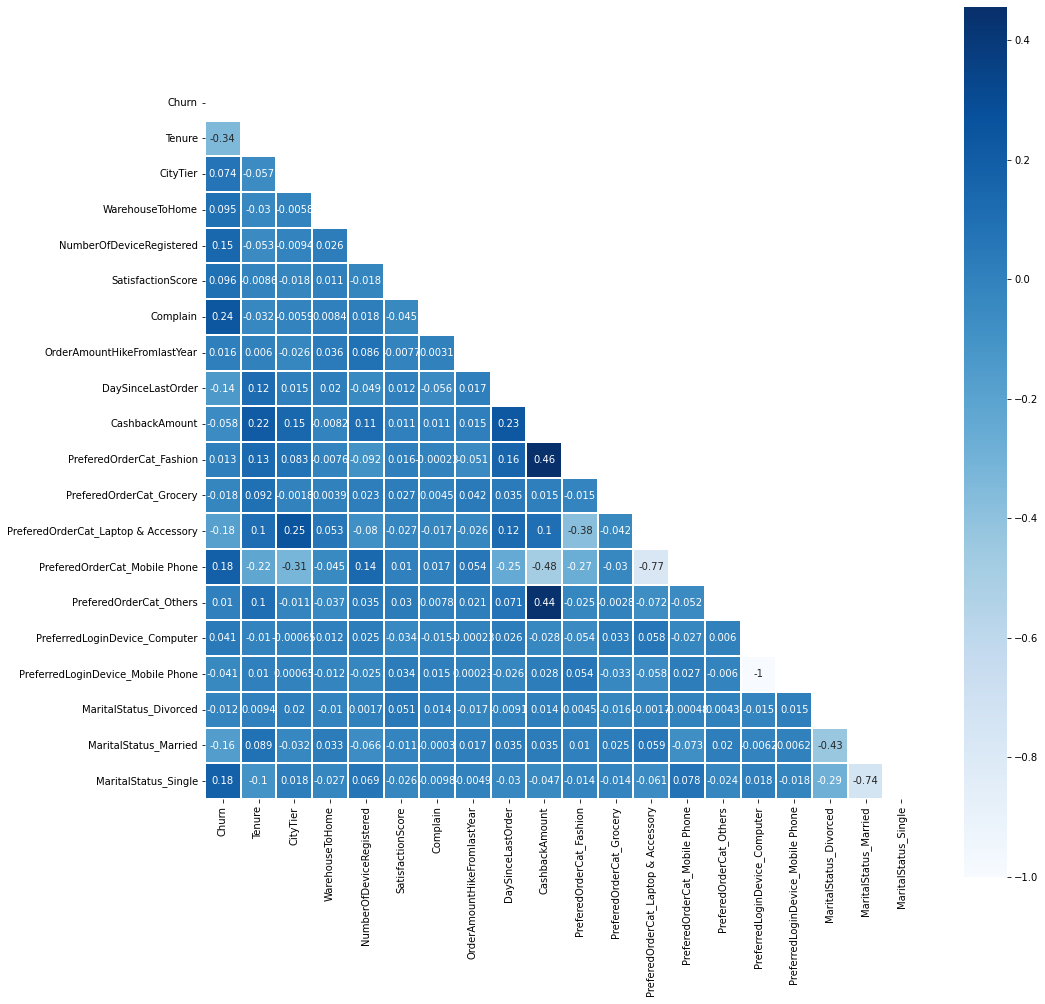

In [ ]:
f, ax = plt.subplots(figsize=(16, 16))
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2.corr(),cmap="Blues",mask=mask, square=True,linewidths=1,annot=True)

Dari heatmap di atas, beberapa variabel yang paling berkaitan dengan variabel target adalah **Tenure, DaySinceLastOrder, Complain, PreferedOrderCat_Mobile Phone, PreferedOrderCat_Laptop & Accessory, dan MaritalStatus_Single**

In [ ]:
best_var = ['Churn','Tenure', 'DaySinceLastOrder','Complain', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Laptop & Accessory', 'MaritalStatus_Single']
df3 = df2[best_var]

##Mengatasi Dataset Imbalance

In [ ]:
df3['Churn'].value_counts()

0    3137
1     630
Name: Churn, dtype: int64

In [ ]:
df3['Churn0'] = df3['Churn']==0
df3['Churn0'].value_counts()

True     3137
False     630
Name: Churn0, dtype: int64

In [ ]:
X = df3[[col for col in df3.columns if (str(df3[col].dtype) != 'object') and col not in ['Churn0']]]
y = df3['Churn0'].values
print(X.shape)
print(y.shape)

(3767, 7)
(3767,)


In [ ]:
from imblearn import under_sampling
X_over, y_over = under_sampling.RandomUnderSampler().fit_resample(X, y)
pd.Series(y_over).value_counts()

False    630
True     630
dtype: int64

In [ ]:
df3 = X_over

Data telah siap dimodeling dengan evaluasi regresi. Sekarang data akan diexport dengan kode berikut:

##Kesimpulan

Pada tahap Machine Learning Preparation telah dilakukan tahapan berikut ini:
* Mengatasi missing values
* Mengatasi data duplikasi
* Mengatasi data outlier dengan metode IQR dan menghapus outlier ekstrem
* Normalisasi dan standarisasi
* Feature Encoding
* Feature Selection
* Mengatasi Imbalance Dataset

# Modelling Machine Learning (Task 5)

## Train test Split

Disini kita bagi dulu df3 yang berisi 1 variabel target (Churn) dan 6 variabel yang dianggap paling berpengaruh terhadap variabel target

In [ ]:
from sklearn.model_selection import train_test_split

X = df3.drop(['Churn'], axis=1)
y = df3['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

## Standardization

1. MinMax Scaller untuk distribusi normal
2. Standart Scaller untuk yang distribusinya skew
3. Robust Scaller - banyak outlier

Untuk task kali ini, akan digunakan Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,Tenure,DaySinceLastOrder,Complain,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,MaritalStatus_Single
0,-0.882045,1.129426,1.243163,-0.894427,1.140776,-0.831430
1,1.158114,0.247581,-0.804400,-0.894427,1.140776,-0.831430
2,0.886093,-0.340315,1.243163,-0.894427,1.140776,-0.831430
3,1.702156,-0.340315,1.243163,1.118034,-0.876596,-0.831430
4,-0.882045,-0.634263,1.243163,1.118034,-0.876596,1.202748


## Imbalanced Dataset

Untuk melihat dulu proporsi antara nilai 1 (Churn) dan 0 (tidak Churn)

In [ ]:
# Label proportion
pd.Series(y_train).value_counts()

0    509
1    499
Name: Churn, dtype: int64

## Undersampling

Membuat data undersampling dengan menghapus sebagian data dengan jumlah yang lebih besar dan menyamakan dengan data yang lebih sedikit

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_under).value_counts()

0    499
1    499
Name: Churn, dtype: int64

## SMOTE Oversampling

Membuat data undersampling dengan membuat semacam duplikasi data dengan jumlah yang lebih sedikit hingga menyamai data yang lebih sedikit

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_over).value_counts()

1    509
0    509
Name: Churn, dtype: int64

## Modelling

In [ ]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [ ]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

Prediksi dengan data Under sampling

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_under, y_under)

lr_pred = model_lr.predict(X_test)

eval_classification(model_lr,lr_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.7738
Precision (Test Set): 0.7721
Recall (Test Set): 0.8015
F1-Score (Test Set): 0.7865
AUC: 0.77


Prediksi dengan data oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_over, y_over)

lr_pred = model_lr.predict(X_test)

eval_classification(model_lr,lr_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.7738
Precision (Test Set): 0.7721
Recall (Test Set): 0.8015
F1-Score (Test Set): 0.7865
AUC: 0.77


## Cek Overfitting/Underfitting

In [ ]:
# print the scores on training and test set

print('Training set Oversampling score: {:.4f}'.format(model_lr.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(model_lr.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(model_lr.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(model_lr.score(X_test, y_test)))


Training set Oversampling score: 0.7898
Test set Oversampling score: 0.7738
Training set Undersampling score: 0.7886
Test set Undersampling score: 0.7738


## Null accuracy
Digunkana untuk mengetahui performa model kita apakah memliki kecenderungan ke salah satu class atau tidak.

Rumus : Total data dg label terbanyak/ seluruh data

Metriksnya : Null accuracy harus dibawah nilai accuracy

In [ ]:
# check null accuracy score
def check_nullAccuracy(total_minLabel,total_maxLabel):
  null_accuracy = (total_maxLabel/(total_minLabel+total_maxLabel))
  print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

In [ ]:
y_test.value_counts()

1    131
0    121
Name: Churn, dtype: int64

In [ ]:
check_nullAccuracy(131,121)

Null accuracy score: 0.4802


## Ensemble Learning

1. Bagging : Random Forest
2. Boosting : XGBoost, Adaboost
3. Stacking : Gabungan algoritma apa saja.

### 1. Bagging (RandomForest)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_under, y_under)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8651
Precision (Test Set): 0.8489
Recall (Test Set): 0.9008
F1-Score (Test Set): 0.8741
AUC: 0.86


Skor untuk Undersampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over, y_over)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.8571
Precision (Test Set): 0.8467
Recall (Test Set): 0.8855
F1-Score (Test Set): 0.8657
AUC: 0.86


Skor untuk Oversampling

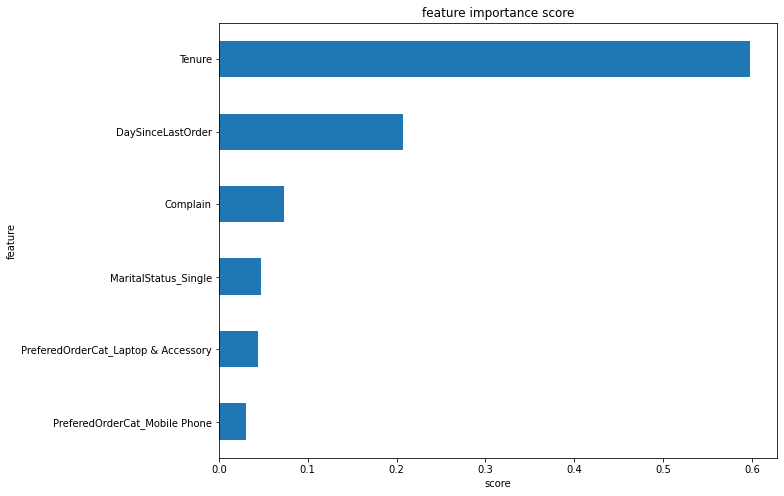

In [ ]:
show_feature_importance(rf)

### 2. Boosting (XGboost)

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=50)
xg.fit(X_under, y_under)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8056
Precision (Test Set): 0.8254
Recall (Test Set): 0.7939
F1-Score (Test Set): 0.8093
AUC: 0.81


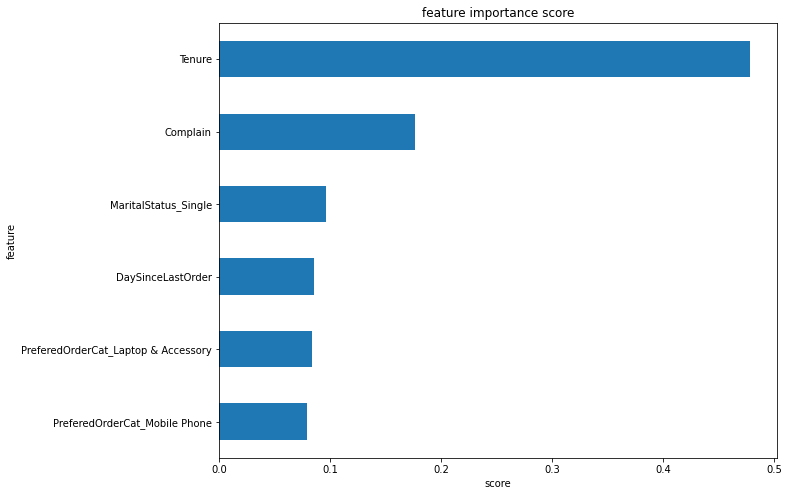

In [ ]:
show_feature_importance(xg)

## Metrix

### A. Confusion Metrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 99  22]
 [ 27 104]]

True Positives(TP) =  99

True Negatives(TN) =  104

False Positives(FP) =  22

False Negatives(FN) =  27


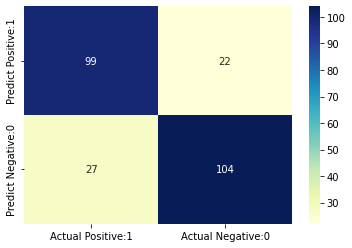

In [ ]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       121
           1       0.83      0.79      0.81       131

    accuracy                           0.81       252
   macro avg       0.81      0.81      0.81       252
weighted avg       0.81      0.81      0.81       252



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
accuracy = (TP+TN) / float(TP+TN+FP+FN)

print('Classification accuracy : {0:0.4f}'.format(accuracy))

Classification accuracy : 0.8056


In [ ]:
class_error = (FP+FN) / float(TP+TN+FP+FN)

print('Classification Error : {0:0.4f}'.format(class_error))

Classification Error : 0.1944


In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.8182


In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity or TPR : {0:0.4f}'.format(recall))

Recall or Sensitivity or TPR : 0.7857


## Threshold

In [ ]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = rf.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.0425    , 0.9575    ],
       [0.0625    , 0.9375    ],
       [0.03      , 0.97      ],
       [0.24521825, 0.75478175],
       [1.        , 0.        ],
       [0.88333333, 0.11666667],
       [0.97      , 0.03      ],
       [0.94966667, 0.05033333],
       [0.05961629, 0.94038371],
       [0.        , 1.        ]])

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Churn (1)', 'Prob of - No Churn (0)'])

y_pred_prob_df

,Prob of - Churn (1),Prob of - No Churn (0)
0,0.042500,0.957500
1,0.062500,0.937500
2,0.030000,0.970000
3,0.245218,0.754782
4,1.000000,0.000000
5,0.883333,0.116667
6,0.970000,0.030000
7,0.949667,0.050333
8,0.059616,0.940384
9,0.000000,1.000000


In [ ]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = rf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

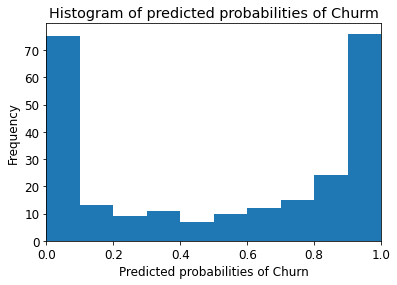

In [ ]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of Churm')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of Churn')
plt.ylabel('Frequency')

In [ ]:
from sklearn.preprocessing import binarize

for i in range(1,9):

    cm1=0

    y_pred1 = rf.predict_proba(X_test)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1,  threshold=i/10)

    # y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    # print(y_test)
    # print(y_pred2)


    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Positives), ','\n\n',

            cm1[1,0],'Type II errors( False Negatives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[ 72  49]
 [  4 127]] 

 with 199 correct predictions,  

 49 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.7896825396825397 

 Sensitivity:  0.9694656488549618 

 Specificity:  0.5950413223140496 



With 0.2 threshold the Confusion Matrix is  

 [[ 86  35]
 [  4 127]] 

 with 213 correct predictions,  

 35 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.8452380952380952 

 Sensitivity:  0.9694656488549618 

 Specificity:  0.7107438016528925 



With 0.3 threshold the Confusion Matrix is  

 [[ 93  28]
 [  4 127]] 

 with 220 correct predictions,  

 28 Type I errors( False Positives),  

 4 Type II errors( False Negatives),  

 Accuracy score:  0.873015873015873 

 Sensitivity:  0.9694656488549618 

 Specificity:  0.768595041322314 



With 0.4 threshold the Confusion Matrix is  

 [[ 97  24]
 [ 11 120]] 

 with 217 correct predictions,  


In [ ]:
y_pred1 = rf.predict_proba(X_test)[:,1]

y_pred1 = y_pred1.reshape(-1,1)

y_pred2 = binarize(y_pred1, threshold= 0.3)

# predicted_final = np.where(y_pred2 == 1, 'Yes', 'No')

Untuk threshold dengan akurasi tertinggi ada di 0.3, sehingga selanjutnya akan digunakan threshold di angka tersebut

In [ ]:
y_pred2[0:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.]])

## ROC AUC

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred2)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8690


## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)], # Jumlah subtree
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 5)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_over, y_over)



# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.8095
Precision (Test Set): 0.8074
Recall (Test Set): 0.8321
F1-Score (Test Set): 0.8195
AUC: 0.81


## Kesimpulan

#### Model yang dipakai

Pada Modelling Machine Learning dataset E-Commerce ini digunakan metode sebagai berikut:
1. Logistic Regression pada data Undersampling
2. Logistic Regression pada data Oversampling
3. Random Forest pada Bagging (Ensemble Learning)
4. Boosting dengan XGBoost (Ensemble Learning)

Untuk metrik evaluasinya ditampilkan
1. Accuracy
2. Recall
3. Precision
4. F1-Score
5. ROC-AUC
6. Null Accuracy
7. Overfitting/Underfitting Checking

Selain itu, dilakukan juga hyperparameter tuning dengan menggunakan Randomized Search

#### Hasil

Hasil terbaik didapatkan pada Bagging dengan model Random Forest dan data undersampling dengan rincian skor sebagai berikut:
* Accuracy (Test Set): 0.8651
* Precision (Test Set): 0.8489
* Recall (Test Set): 0.9008
* F1-Score (Test Set): 0.8741
* AUC: 0.86